In [408]:
import pandas as pd
import numpy as np
import seaborn as sns
from pydataset import data
import scipy.stats as stats
import matplotlib.pyplot as plt
import env
import os

# Hypothesis Testing

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.



Has the network latency gone up since we switched internet service providers?


In [ ]:
#null hypothesis - the latency hasn't decreased or remained the same since switching providers
#alternative hypothesis - the latency has gone up since switching providers

In [ ]:
#a true positive here is rejecting the null hypothesis while that conclusion aligns with reality
#a true negative is failing to reject the null hypothesis while that conclusion aligns with reality
#a false positive (type I error) is rejecting a true null hypothesis, false
#a false negative (type II error) is failing to reject a false null hypothesis

Is the website redesign any good?


In [ ]:
#making this less vague - Is the new website bringing in any more visitors than the old did?
#null hypothesis - the website traffic stayed the same or went down
#alternative hypothesis - the new website design is bringing in more web traffic

In [ ]:
#true positive - correctly rejecting the null hypothesis that traffic hasn't changed since the redesign
#true negative - correctly failing to reject the null hypothesis that traffic hasn't changed
#false positive - incorrectly rejecting the null hypothesis (wrongly predicting that traffic has changed)
#false negative - incorrectly failing to reject the null hypothesis (wrongly predicting that 
                                                                     #traffic has stayed the same)

Is our television ad driving more sales?


In [ ]:
#making a more direct question - Are sales improving with our new tv add?
#null hypothesis - sales haven't changed since airing our new ad
#alternative hypothesis - sales have improved since our new add aired

In [ ]:
#true positive - correctly rejecting the null hypothesis that sales haven't changed (meaning sales have changed)
#true negative - correctly failing to reject the null (meaning that sales haven't changed)
#false positive - incorrectly rejecting the null (predicting sales have changed when they haven't)
#false negative - incorrectly failing to reject the null (predicting sales haven't changed when they have)

# T-test Exercises

Answer with the type of test you would use (assume normal distribution):

Is there a difference in grades of students on the second floor compared to grades of all students?


In [2]:
#I would use a one sample t-test with 2 tails

#the reason I would use this is because I'm pulling a smaller group from within the total population
#to compare that group to the overall population. It has two tails because I'm looking for a difference
#in grades either way, not just higher or lower

Are adults who drink milk taller than adults who dont drink milk?


In [ ]:
#I would use a 2 sample (Independent) t-test with one tail

#the reason I would use this is because I'm taking two populations, adults who drink milk and adults who don't
# and comparing them to eachother. It has one tail because I'm specifically looking for adults whether adults who
#drink milk are taller, not that there's a difference in either direction

Is the the price of gas higher in texas or in new mexico?


In [ ]:
#As above, I would use a 2 sample (Independent) t-test with one tail

#I would use this because I'm taking two separate populations and comparing an observation
#of each of them together. It has one tail because I'm specifically looking for which gas price is higher
#not whether or not there's a difference at all

Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?


In [ ]:
#For this I would use one of two tests, either the ANOVA test, or the Kruskal-Wallis Test. 
#To determine from there I would have to figure out if the variance of the two means is equal or not, and
#if it is, I would use the ANOVA test

#The reasoning behind this is because I'm comparing more than two independent groups from our 
#population together

*BONUS* 

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



$H_0$ : group 1 average sales time == group 2 average sales time   
$H_a$ : group  average sales time != group 2 average sales time

In [103]:
#compare two samples to see if the averages differ
#sample 1 - 40, with an avg of 90 and std of 15
#sample 2 - 50 with an avg of 100 and std of 20

alpha = .05

In [122]:
group_one = stats.norm(90, 15)
group_two = stats.norm(100, 20)

group_one_samples = group_one.rvs(40)
group_two_samples = group_two.rvs(50)

In [129]:
group_one_samples.var(), group_two_samples.var()

(169.9232622948603, 350.72058642489725)

In [131]:
#checking to see similarity between the two variances of the distributions
stats.levene(group_one_samples, group_two_samples)

LeveneResult(statistic=4.8105940389609785, pvalue=0.030921920454348408)

In [126]:
t, p = stats.ttest_ind(group_one_samples, group_two_samples, equal_var=False)

t, p, alpha

(-2.918875996576063, 0.004476663861761088, 0.05)

In [128]:
#checking to see if there's a difference between the two offices
if p > alpha:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


Takeaway here: We rejected the null hypothesis, there is a significant difference betwen the two offices

#### Load the mpg dataset and use it to answer the following questions:

##### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

$H_0$ : Fuel efficiency in cars from 1999 == to cars from 2008  
$H_a$ : Fuel efficiency in cars from 1999 != to cars from 2008

In [147]:
mpg = data('mpg')

In [148]:
mpg['avg_mileage'] = (mpg.cty + mpg.hwy ) / 2

In [149]:
old_mileage = mpg[mpg.year == 1999].avg_mileage
new_mileage = mpg[mpg.year == 2008].avg_mileage

In [157]:
len(new_mileage), len(old_mileage)

(117, 117)

In [158]:
new_mileage.var(), old_mileage.var()

(24.097480106100797, 27.122605363984682)

In [159]:
alpha = .05

t, p = stats.ttest_ind(old_mileage, new_mileage)

t, p, alpha

(0.21960177245940962, 0.8263744040323578, 0.05)

In [162]:
if p >= alpha:
    print('We fail to reject the null hypothesis.')
else:
    print('We reject the null hypothesis.')

We fail to reject the null hypothesis.


Takeaway here: We have failed to reject the null hypothesis; there is no significant different in fuel efficiency between cars made in 1999 and 2008

##### Are compact cars more fuel-efficient than the average car?


$H_0$ : Compact cars fuel efficiency <= average cars  
$H_a$ : Compact cars fuel efficieny > average cars

In [165]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [164]:
compact = mpg[mpg['class'] == 'compact'].avg_mileage
avg_car = mpg[mpg['class'] != 'compact'].avg_mileage

In [51]:
t, p = stats.ttest_ind(compact, avg_car)
t, p

(6.64827845008505, 2.099472418046584e-10)

In [64]:
print(f'p-value < alpha? {p < alpha}')
print(f't > 0? {t>0}')

p-value < alpha? True
t > 0? True


In [65]:
if p  > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


##### Class example

In [166]:
compact_eff = mpg[mpg['class'] == 'compact']['avg_mileage']
mean_eff = mpg['avg_mileage'].mean()

In [167]:
t2, p2 = stats.ttest_1samp(compact_eff, mean_eff)
t2, p2

(7.896888573132533, 4.1985637943171486e-10)

In [170]:
if t2 > 0 and p2/2 <= alpha:
    print('Reject null')
else:
    print('Fail to reject null')

Reject null


##### Do manual cars get better gas mileage than automatic cars?


In [172]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


$H_0$ : Manual cars mileage <= automatic cars  
$H_a$ : Manual cars mileage > automatic cars

In [173]:
mpg['manual'] = mpg.trans.str.startswith('m')
mpg['auto'] = mpg.trans.str.startswith('a')

In [174]:
manual = mpg[mpg['manual'] == True].avg_mileage
auto = mpg[mpg['auto'] == True].avg_mileage
manual.count(), auto.count()

(77, 157)

In [175]:
manual.var(), auto.var()

(26.635167464114826, 21.942777233382337)

In [96]:
t, p = stats.ttest_ind(manual, auto, equal_var=False)

t, p, alpha

(4.4872852093583395, 1.5159804538232562e-05, 0.05)

In [177]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


In [176]:
if t > 0 and p/2 < alpha:
    print('Reject Null')
else:
    print('Fail to reject the null')

Fail to reject the null


# Correlation Exercises

Answer with the type of stats test you would use (assume normal distribution):

Is there a relationship between the length of your arm and the length of your foot?  

- PearsonsR test or Spearmans since we don't know if there's a normal distribution

Do guys and gals quit their jobs at the same rate?  

- Independent T-test (two tailed)

Does the length of time of the lecture correlate with a students (numeric) grade?

- PearsonsR or Spearmans test

In [337]:
#this is my function to run a SQL query to get data from a database
def get_db_url(db, env_file=os.path.exists('env.py')):
    
    if env_file:    
        username, password, host = (env.username, env.password, env.host)   
        return f'mysql+pymysql://{username}:{password}@{host}/{db}'
    else: 
        return "Hellooooo, you need a username and password, genius."

url = get_db_url('telco_churn')
query = 'SELECT * FROM customers'
telco_churn = pd.read_sql(query, url)

Use the telco_churn data:

Does tenure correlate with monthly charges?

- state hypothesis, set alpha value
- select data
- plot the data 
- test for assumptions (normal distribution for correlation)
- run test
- draw conclusions

Hypothesis

$H_0$ : There is no linear correlation between tenure and monthly charges  
$H_a$ : There is a linear correlation between tenure and monthly charges



In [338]:
telco_churn.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [346]:
#selecting data
#these are the categories I need to answer the qustion properly
charges_df = df[['monthly_charges', 'tenure']]

#checking the info to see what data types I have
charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  7043 non-null   float64
 1   tenure           7043 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

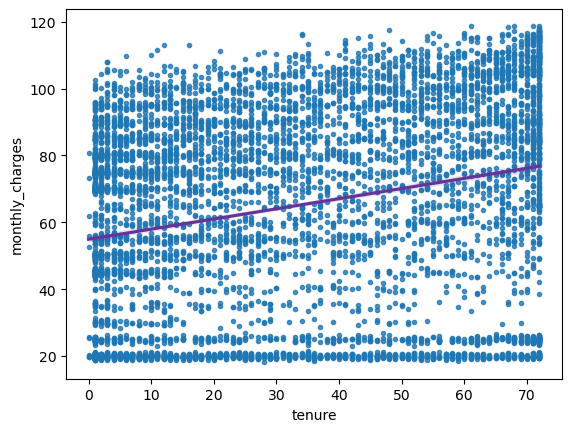

In [345]:
#plotting the data
#getting some kind of visual to see my data represented
sns.regplot(x='tenure', y='monthly_charges', data=charges_df, marker='.', line_kws={'color':'rebeccapurple'})

<AxesSubplot:>

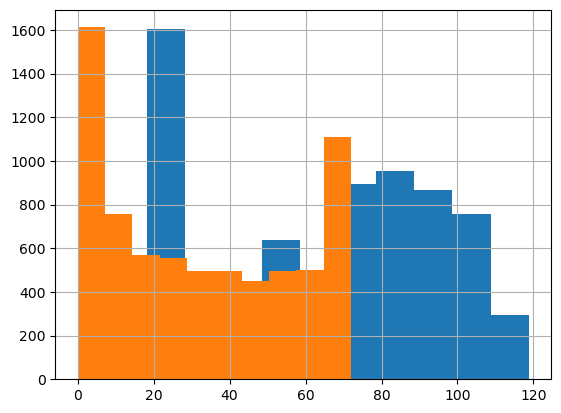

In [347]:
#distributions of the data to check for normality
#checking to see if the data distribution is normal or not, so I know whether or not I need to use a parametric or 
#non parametric test
charges_df.monthly_charges.hist()
charges_df.tenure.hist()

These distributions are not normal, so we will use the Spearmans test for this

In [384]:
#in this case, the distributions were not normal so we went with the non parametric version of the pearsonsR test
alpha = 0.05
r, p = stats.spearmanr(charges_df.tenure, charges_df.monthly_charges)
if p < alpha:
    print(f'reject the null hypothesis, there is a linear correlation between monthy charges and tenure \
    (p-value: {p})')
else:
    print(f'we fail to reject the null hypothesis that there is a linear correlation between monthly charges and \
    tenure (p-value: {p})')
r

reject the null hypothesis, there is a linear correlation between monthy charges and tenure     (p-value: 1.0271266876409408e-123)


0.27641678933130215

**Takeaways**

There *is* a correlation between monthly charges and tenure  
With an r of .28, the correlation is 'weak-to-moderate'

Total charges?

- state hypothesis, set alpha value
- select data, check for null values
- plot the data 
- test for assumptions (normal distribution for correlation)
- run test
- draw conclusions

- $H_0$ : Tenure and total charges have no linear correlation 
- $H_a$ : There is a linear correlation between tenure and total charges


In [375]:
#rinse and repeat here
alpha = 0.05

#select the data
#the data we need to asnwer the question
ttl_charges_df = df[['tenure', 'total_charges']]

#looking at a summary of the df
#summarizing our data to see if any corrections need to be made
ttl_charges_df.info()

#try to find data errors
#in this case, one of our columns was a string, and we needed it to be a float
ttl_charges_df.total_charges.sort_values()

#convert the empty space to '0'
ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype(float)

#confirming data types
ttl_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tenure         7043 non-null   int64 
 1   total_charges  7043 non-null   object
dtypes: int64(1), object(1)
memory usage: 110.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7043 non-null   int64  
 1   total_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


/var/folders/zk/vf208zwx67vf8nf5b5xtyllw0000gn/T/ipykernel_26650/2809334806.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype(float)


<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

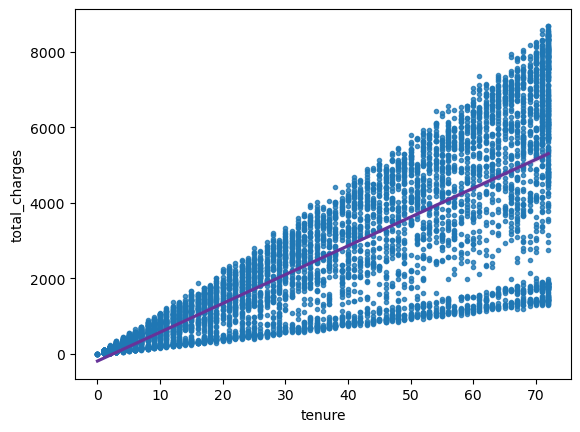

In [376]:
#plot the data
#as above, we want to visually see our data
sns.regplot(x='tenure', y='total_charges', data=ttl_charges_df, marker='.', line_kws={'color':'rebeccapurple'})

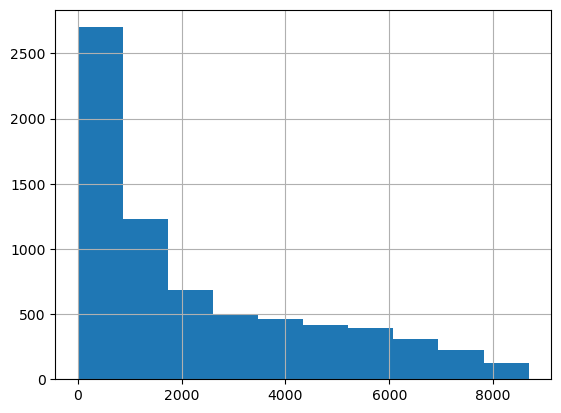

<AxesSubplot:>

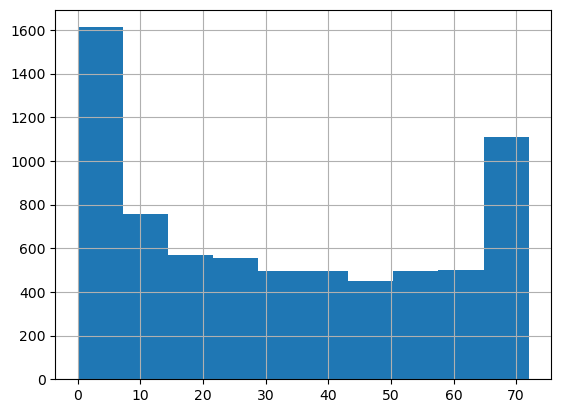

In [377]:
#check assumptions (that the data is normal, the variance is the same, and we have enough data points)

ttl_charges_df.total_charges.hist()
plt.show()
ttl_charges_df.tenure.hist()

Because these are not normally distributed we will use the Spearmans test

In [382]:
#run our test
#as above, our data is not normally distributed, so we need the non parametric version of the pearsonsR test
r, p = stats.spearmanr(ttl_charges_df.tenure, ttl_charges_df.total_charges)

def eval_result(alpha, p):
    if p < alpha:
        print(f'We reject the null hypothesis. There is a linear correlation (p-value: {p})')
    else:
        print(f'We fail to reject the null hypothesis that there is a linear correlation. (p-value: {p})')
    
eval_result(alpha, p)

r

We reject the null hypothesis. There is a linear correlation (p-value: 0.0)


0.8896957900597577

**Takeaway**

There is a linear correlation between tenure and total charges. With an r of .89, the correlation is strong.

What happens if you control for phone and internet service?

Looking at the combination of phone service and no internet first

- state hypothesis, set alpha value
- select data, check for null values
- plot the data 
- test for assumptions (normal distribution for correlation)
- run test
- draw conclusions

Of customers who have only phone service:  
$H_0$ : There is no linear correlation between tenure and monthly charges  
$H_a$ : There is linear correlation between tenure and monthly charges

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           1739 non-null   int64  
 1   monthly_charges  1739 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


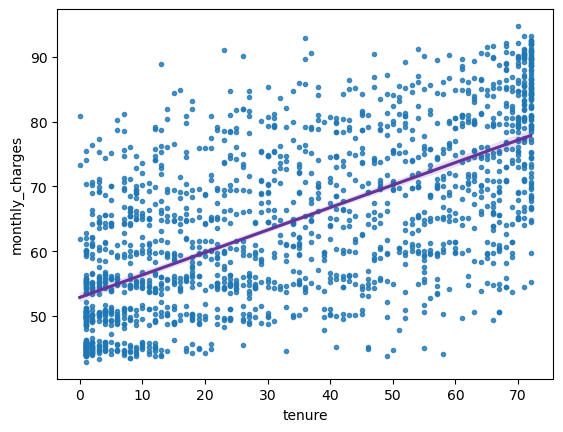

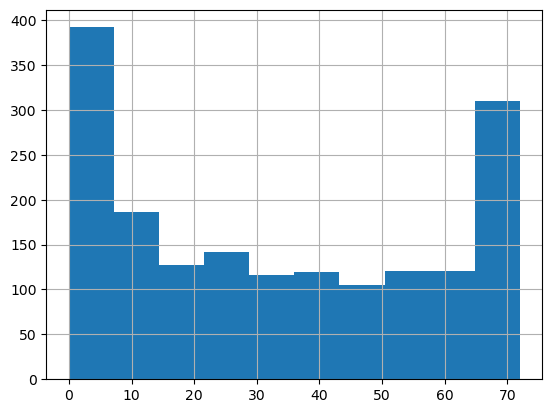

<AxesSubplot:>

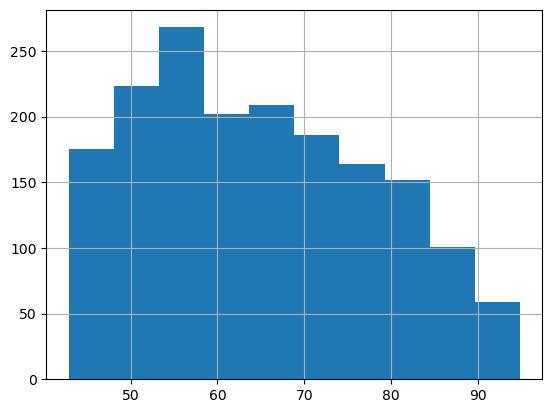

In [392]:
#same as the above
#set alpha
alpha = .05

#select the data
phone_df = df[(df.phone_service == 'Yes') & (df.internet_service_type_id == 1)][['tenure', 'monthly_charges']]
phone_df.info()

#plot the data
sns.regplot(x='tenure', y='monthly_charges', data=phone_df, marker='.', line_kws={'color':'rebeccapurple'})
plt.show()

#check for normal distribution
phone_df.tenure.hist()
plt.show()
phone_df.monthly_charges.hist()

In [396]:
#we will use the spearmans test due to the violation of the assumption of normality
#this distribution is also not normal, hence the spearmanr test
r, p = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)

eval_result(alpha, p)
print(f'r-value = {r}')

We reject the null hypothesis. There is a linear correlation (p-value: 5.423601644635052e-222)
r-value = 0.6644708508462759


**Takeaway**

There is a moderate-strong correlation between tenure and monthly charges for customers who have only phone service.

Use the employees database:

Is there a relationship between how long an employee has been with the company and their salary?

In [450]:
#my function to return information from a database
def get_db_url(db, env_file=os.path.exists('env.py')):
    
    if env_file:    
        username, password, host = (env.username, env.password, env.host)   
        return f'mysql+pymysql://{username}:{password}@{host}/{db}'
    else: 
        return "Hellooooo, you need a username and password, genius."

url = get_db_url('employees')

query = '''
SELECT * 
FROM employees 
JOIN salaries USING (emp_no) 
JOIN titles USING (emp_no) 
WHERE salaries.to_date = '9999-01-01';
'''

df = pd.read_sql(query, url)

- state hypothesis, set alpha value
- select data, check for null values
- plot the data 
- test for assumptions (normal distribution for correlation)
- run test
- draw conclusions

Is there a relationship between an employee's tenure and their salary?

$H_0$ : There is not a relationship between tenure and salary  
$H_a$ : There is a relationship 

In [465]:
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date,tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01,13311
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01,13528
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01,13248
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Engineer,1986-12-01,1995-12-01,13153
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01,13153


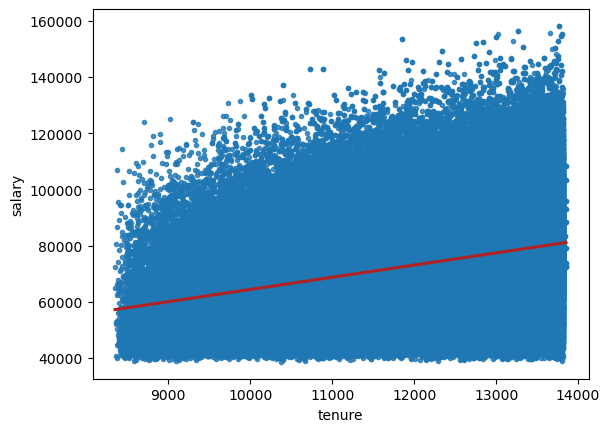

In [466]:
#we need to calculate emplyee tenure here, and compare it to the salaries
alpha = .05 

#select our data, calculate tenure
df['tenure'] = pd.to_datetime('today') - pd.to_datetime(df.hire_date)
df['tenure'] = df.tenure.astype('str').str.split(' ', expand=True)[0].astype('int')

#df.info()
tenure_df = df[['tenure', 'salary']]

#plot the data
sns.regplot(x='tenure', y='salary', data=tenure_df, marker='.', line_kws=({'color':'firebrick'}))

#run the test
r, p = stats.spearmanr(tenure_df.tenure, tenure_df.salary)
#once again, our data is not normally distributed and we need to use the spearmanr test

In [453]:
#evaluate results
eval_result(alpha, p)

print('r-value: ', r)

We reject the null hypothesis. There is a linear correlation (p-value: 0.0)
r-value:  0.31300743060757247


Is there a relationship between how long an employee has been with the company and the number of titles they have had?

- state hypothesis, set alpha value
- select data, check for null values
- plot the data 
- test for assumptions (normal distribution for correlation)
- run test
- draw conclusions

$H_0$ : There is no relationship between tenure and number of titles  
$H_a$ : There is a relationship between tenure and number of titles

In [467]:
alpha = .05

#select the data
def get_db_url(db, env_file=os.path.exists('env.py')):
    
    if env_file:    
        username, password, host = (env.username, env.password, env.host)   
        return f'mysql+pymysql://{username}:{password}@{host}/{db}'
    else: 
        return "Hellooooo, you need a username and password, genius."

url = get_db_url('employees')
query = '''
select t.emp_no, count(t.title) AS num_titles, te.tenure
from titles t
join(select emp_no, datediff(now(), min(from_date)) AS tenure
from titles
group by emp_no
having max(to_date) = '9999-01-01'
) te USING (emp_no)
group by t.emp_no;
'''
titles = pd.read_sql(query, url)
titles.info()

#getting our titles and tenure
titles = titles[['num_titles', 'tenure']]
titles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   emp_no      240124 non-null  int64
 1   num_titles  240124 non-null  int64
 2   tenure      240124 non-null  int64
dtypes: int64(3)
memory usage: 5.5 MB


,num_titles,tenure
0,1,13311
1,1,9620
2,1,9864
3,2,13153
4,2,12137


Because the number of titles is a discrete value, we should run and ANOVA test or a kruskal wallis test to test whether the average salary of those with 1 title is different from those with 2, or those with 2 different from 3, ect.

Assumptions: 
- Do they have equal variance? 
- Are there enough observations? 
- Are they independent?

In [455]:
#observations 
#checking to see if we have enough data points
titles.num_titles.value_counts()

2    125345
1    111892
3      2887
Name: num_titles, dtype: int64

In [458]:
#equal variance?
#h_o the variance is equal
#h_a the variance is not equal
stats.levene(titles.num_titles, titles.tenure)

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

The variances are significantly different, so we would use a kruskal wallis test.

In [459]:
stats.kruskal(titles.num_titles, titles.tenure)

KruskalResult(statistic=371488.64419334417, pvalue=0.0)

Use the sleepstudy data.
Is there a relationship between days and reaction time?


In [461]:
sstudy = data('sleepstudy')

#getting some base info about the dataset
sstudy.info()
sstudy.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


$H_0$ : There is no linear correlation between days and reaction time  
$H_a$ : There *is* linear correlation between days and reaction time

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

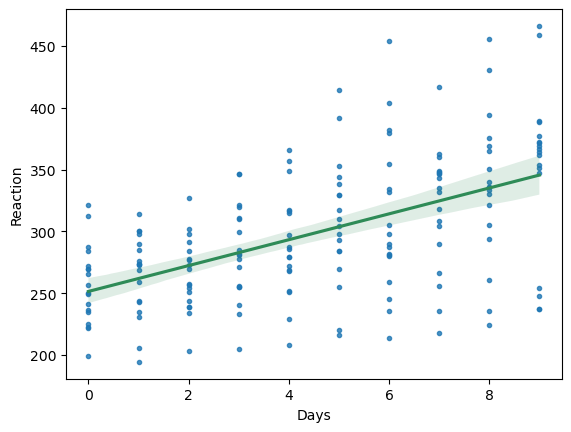

In [462]:
alpha = .05

#select the data
sstudy = sstudy[['Reaction', 'Days']]

#plot the data
sns.regplot(x='Days', y='Reaction', data=sstudy, marker='.', line_kws=({'color':'seagreen'}))

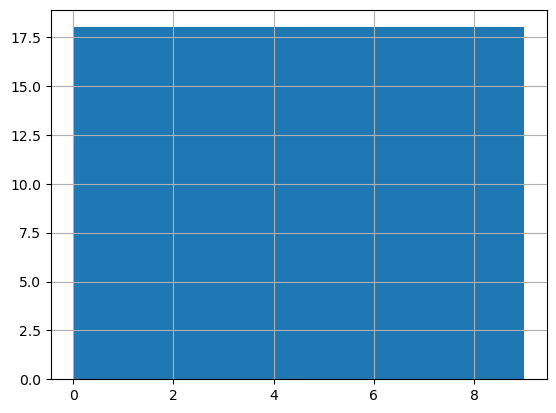

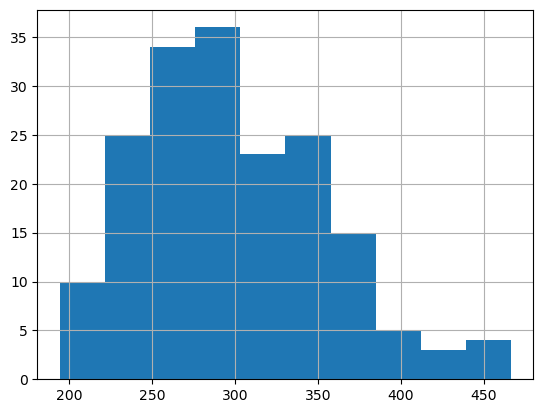

In [463]:
#check for normal distribution, plot histograms

sstudy.Days.hist()
plt.show()
sstudy.Reaction.hist()
plt.show()

Days is uniformly distributed, and reaction time is normally distributed.

In [464]:
#run the test

r, p = stats.spearmanr(sstudy.Days, sstudy.Reaction)
eval_result(alpha, p)
print('r-value ', r)

We reject the null hypothesis. There is a linear correlation (p-value: 5.132878057706873e-14)
r-value  0.5228138502259547


**Takeaway**

There is a moderate correlation between days and reaction time.